In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium  # for hotspot visualization on map

# Configure plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


In [3]:
# Step 2: Load dataset
df = pd.read_csv("C:/Users/anusha/OneDrive/Desktop/accident.csv")

# Display first few rows
df.head()


,Accident_ID,Date,Time,Weather,Road_Condition,Severity,Latitude,Longitude,Speed_Limit,Visibility,Temperature
0,A001,2024-05-12,08:15,Clear,Dry,2,12.9716,77.5946,60,10,30
1,A002,2024-05-12,22:45,Rain,Wet,4,13.0827,80.2707,50,4,24
2,A003,2024-05-13,18:30,Fog,Dry,3,19.0760,72.8777,40,2,20
3,A004,2024-05-13,14:00,Clear,Wet,1,28.6139,77.2090,70,9,34
4,A005,2024-05-14,07:20,Rain,Wet,3,22.5726,88.3639,55,6,26


In [5]:
# Step 3: Explore dataset
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Accident_ID     10 non-null     object 
 1   Date            10 non-null     object 
 2   Time            10 non-null     object 
 3   Weather         10 non-null     object 
 4   Road_Condition  10 non-null     object 
 5   Severity        10 non-null     int64  
 6   Latitude        10 non-null     float64
 7   Longitude       10 non-null     float64
 8   Speed_Limit     10 non-null     int64  
 9   Visibility      10 non-null     int64  
 10  Temperature     10 non-null     int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1012.0+ bytes


Accident_ID       0
Date              0
Time              0
Weather           0
Road_Condition    0
Severity          0
Latitude          0
Longitude         0
Speed_Limit       0
Visibility        0
Temperature       0
dtype: int64

In [7]:
# Step 4: Data Cleaning
df.dropna(inplace=True)
df = df[df['Severity'] != 0]  # Remove any zero-severity rows if present


C:\Users\anusha\AppData\Local\Temp\ipykernel_22304\3494748973.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour
C:\Users\anusha\AppData\Local\Temp\ipykernel_22304\3494748973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='coolwarm')


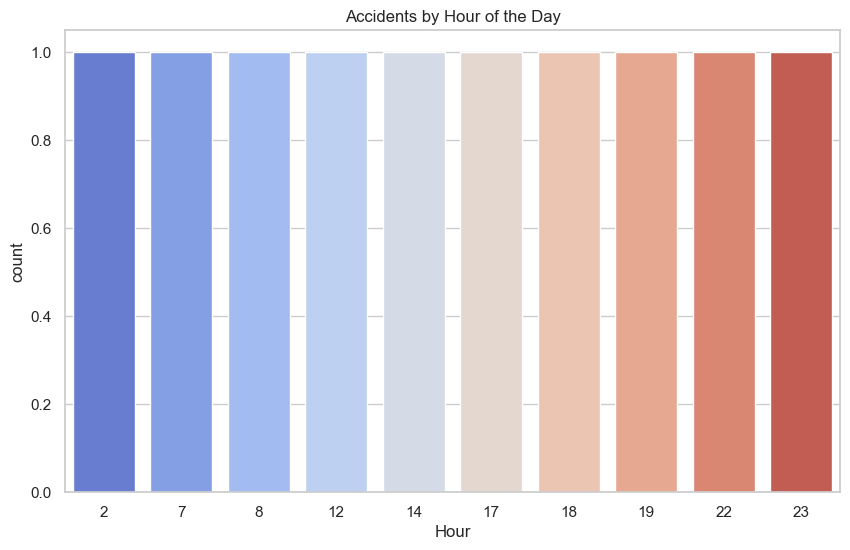

C:\Users\anusha\AppData\Local\Temp\ipykernel_22304\3494748973.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Weather', data=df, order=df['Weather'].value_counts().index, palette='viridis')


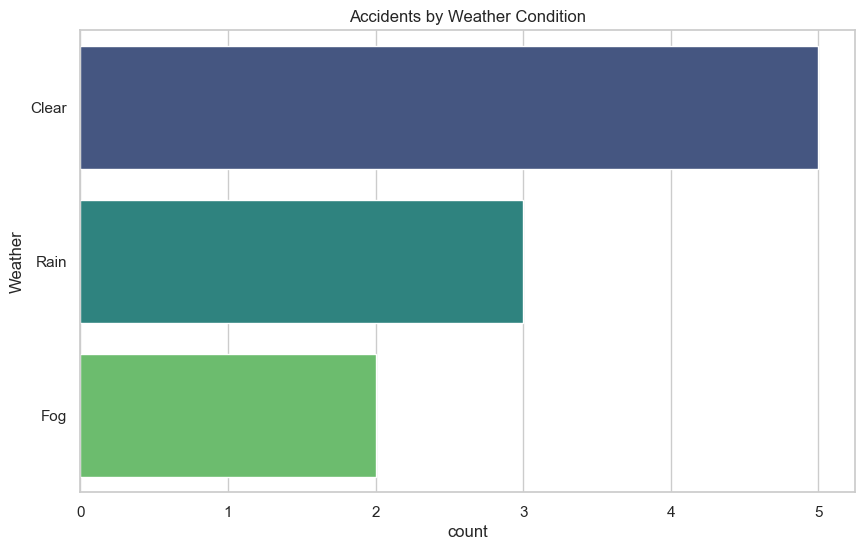

C:\Users\anusha\AppData\Local\Temp\ipykernel_22304\3494748973.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Road_Condition', data=df, order=df['Road_Condition'].value_counts().index, palette='mako')


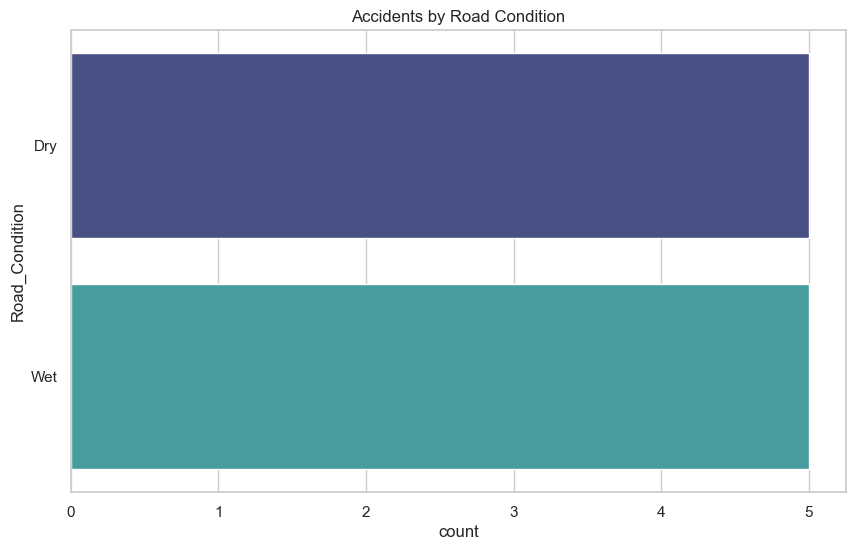

In [13]:
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

sns.countplot(x='Hour', data=df, palette='coolwarm')
plt.title('Accidents by Hour of the Day')
plt.show()

sns.countplot(y='Weather', data=df, order=df['Weather'].value_counts().index, palette='viridis')
plt.title('Accidents by Weather Condition')
plt.show()

sns.countplot(y='Road_Condition', data=df, order=df['Road_Condition'].value_counts().index, palette='mako')
plt.title('Accidents by Road Condition')
plt.show()



In [15]:
# Create map centered around average location
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=6)

# Add accident points
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

m


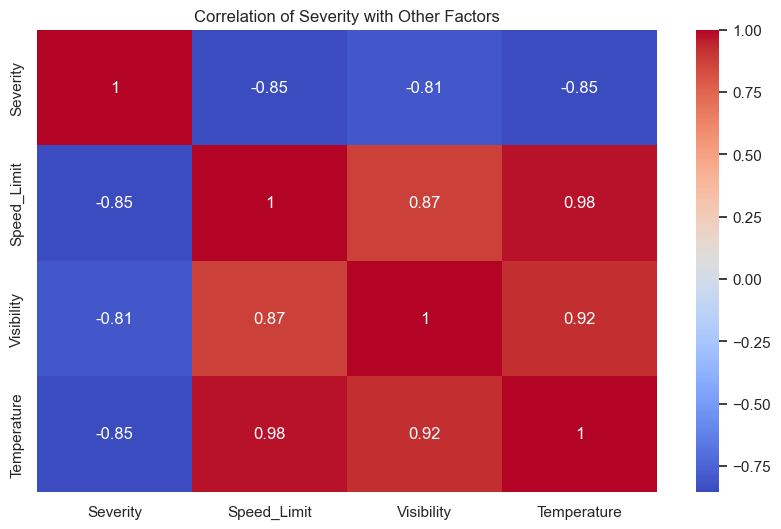

In [17]:
corr = df[['Severity', 'Speed_Limit', 'Visibility', 'Temperature']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Severity with Other Factors")
plt.show()
